# Hello there friend !

I am a data professional with over eight years of experience spanning data science, data engineering, and analytics. In my years in the workforce I have worked on many data related task that address the full data lifecycle from data ingestion and exploratory analysis and creating reports and vizuals to advanced model building and performance evaluation and deployment. 

Statistical learning is the branch of Mathematical Statistics that covers modeling methodologies - these are split into Machine Learning and Deep Learning - ( ML/Ai )
in this notebook i wanted to showcase the widest possible net i could cast of Machine Learning skills and Methodologies. ( i will reserve showcasing Ai Skills for more advanced datasets such as images and text since thats what seems to be the hot fashion now a days - but one cannot claim to know Ai literature and application and gloss over ML ) 

Andrew NG famously mentioned - that the main mistake he sees data science teams repeat over and over, is that they sometimes spend months of valueable time and resources thinking of the "best approach" when they should rather first focus on setting a complete pipeline that can be refined instead - I have seen this for myself in the workplace. which is why if I was asked to create a model for a dataset - the first thing i do, is set up a pipeline with a Baseline model first - so that I can measure performance - and then tweak and improve and measure performance of the improved versions. This pipeline is an example of this idea.

I would encourage you to please just scroll through to get an idea of this thought process of implementing a complete pipeline, comparing multiple skills and applying a wide range of ML skills - to put together this work i worked on these functions peice by peice, one idea at a time, we can tweak models, create ensambles of them, i am ready to dicuss/apply all aspects of the Mathematics/Statistics/Programming! 

In [1]:
import os
import math
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.4f}'.format)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, TweedieRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
warnings.filterwarnings("ignore")

######################################################################################################

print('\n') 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

######################################################################################################

train_path = "/kaggle/input/home-data-for-ml-course/train.csv"
test_path = "/kaggle/input/home-data-for-ml-course/test.csv" 

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path) 

print('\n')
print('Preview of Training Data') 
display(df_train.head())



/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


Preview of Training Data


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL      65.0000     8450   Pave   NaN      Reg   
1   2          20       RL      80.0000     9600   Pave   NaN      Reg   
2   3          60       RL      68.0000    11250   Pave   NaN      IR1   
3   4          70       RL      60.0000     9550   Pave   NaN      IR1   
4   5          60       RL      84.0000    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]


=== TRAIN DATA - Numeric Columns Analysis ===



Data Type  Missing Count  Missing %      count         mean  \
Column                                                                      
1stFlrSF          int64              0     0.0000 1,460.0000   1,162.6270   
2ndFlrSF          int64              0     0.0000 1,460.0000     346.9920   
3SsnPorch         int64              0     0.0000 1,460.0000       3.4100   
BedroomAbvGr      int64              0     0.0000 1,460.0000       2.8660   
BsmtFinSF1        int64              0     0.0000 1,460.0000     443.6400   
BsmtFinSF2        int64              0     0.0000 1,460.0000      46.5490   
BsmtFullBath      int64              0     0.0000 1,460.0000       0.4250   
BsmtHalfBath      int64              0     0.0000 1,460.0000       0.0580   
BsmtUnfSF         int64              0     0.0000 1,460.0000     567.2400   
EnclosedPorch     int64              0     0.0000 1,460.0000      21.9540   
Fireplaces        int64              0     0.0000 1,460.0000       0.6130   
FullBath          int64              0     0.0000 1,460.0000       1.5650   
GarageArea        int64              0     0.0000 1,460.0000     472.9800   
GarageCars        int64              0     0.0000 1,460.0000       1.7670   
GrLivArea         int64              0     0.0000 1,460.0000   1,515.4640   
HalfBath          int64              0     0.0000 1,460.0000       0.3830   
Id                int64              0     0.0000 1,460.0000     730.5000   
KitchenAbvGr      int64              0     0.0000 1,460.0000       1.0470   
LotArea           int64              0     0.0000 1,460.0000  10,516.8280   
LowQualFinSF      int64              0     0.0000 1,460.0000       5.8450   
MSSubClass        int64              0     0.0000 1,460.0000      56.8970   
MiscVal           int64              0     0.0000 1,460.0000      43.4890   
MoSold            int64              0     0.0000 1,460.0000       6.3220   
OpenPorchSF       int64              0     0.0000 1,460.0000      46.6600   
OverallCond       int64              0     0.0000 1,460.0000       5.5750   
OverallQual       int64              0     0.0000 1,460.0000       6.0990   
PoolArea          int64              0     0.0000 1,460.0000       2.7590   
SalePrice         int64              0     0.0000 1,460.0000 180,921.1960   
ScreenPorch       int64              0     0.0000 1,460.0000      15.0610   
TotRmsAbvGrd      int64              0     0.0000 1,460.0000       6.5180   
TotalBsmtSF       int64              0     0.0000 1,460.0000   1,057.4290   
WoodDeckSF        int64              0     0.0000 1,460.0000      94.2450   
YearBuilt         int64              0     0.0000 1,460.0000   1,971.2680   
YearRemodAdd      int64              0     0.0000 1,460.0000   1,984.8660   
YrSold            int64              0     0.0000 1,460.0000   2,007.8160   
GarageYrBlt     float64             81     5.5480 1,379.0000   1,978.5060   
LotFrontage     float64            259    17.7400 1,201.0000      70.0500   
MasVnrArea      float64              8     0.5480 1,452.0000     103.6850   

                      std         min          25%          50%          75%  \
Column                                                                         
1stFlrSF         386.5880    334.0000     882.0000   1,087.0000   1,391.2500   
2ndFlrSF         436.5280      0.0000       0.0000       0.0000     728.0000   
3SsnPorch         29.3170      0.0000       0.0000       0.0000       0.0000   
BedroomAbvGr       0.8160      0.0000       2.0000       3.0000       3.0000   
BsmtFinSF1       456.0980      0.0000       0.0000     383.5000     712.2500   
BsmtFinSF2       161.3190      0.0000       0.0000       0.0000       0.0000   
BsmtFullBath       0.5190      0.0000       0.0000       0.0000       1.0000   
BsmtHalfBath       0.2390      0.0000       0.0000       0.0000       0.0000   
BsmtUnfSF        441.8670      0.0000     223.0000     477.5000     808.0000   
EnclosedPorch     61.1190      0.0000       0.0000   

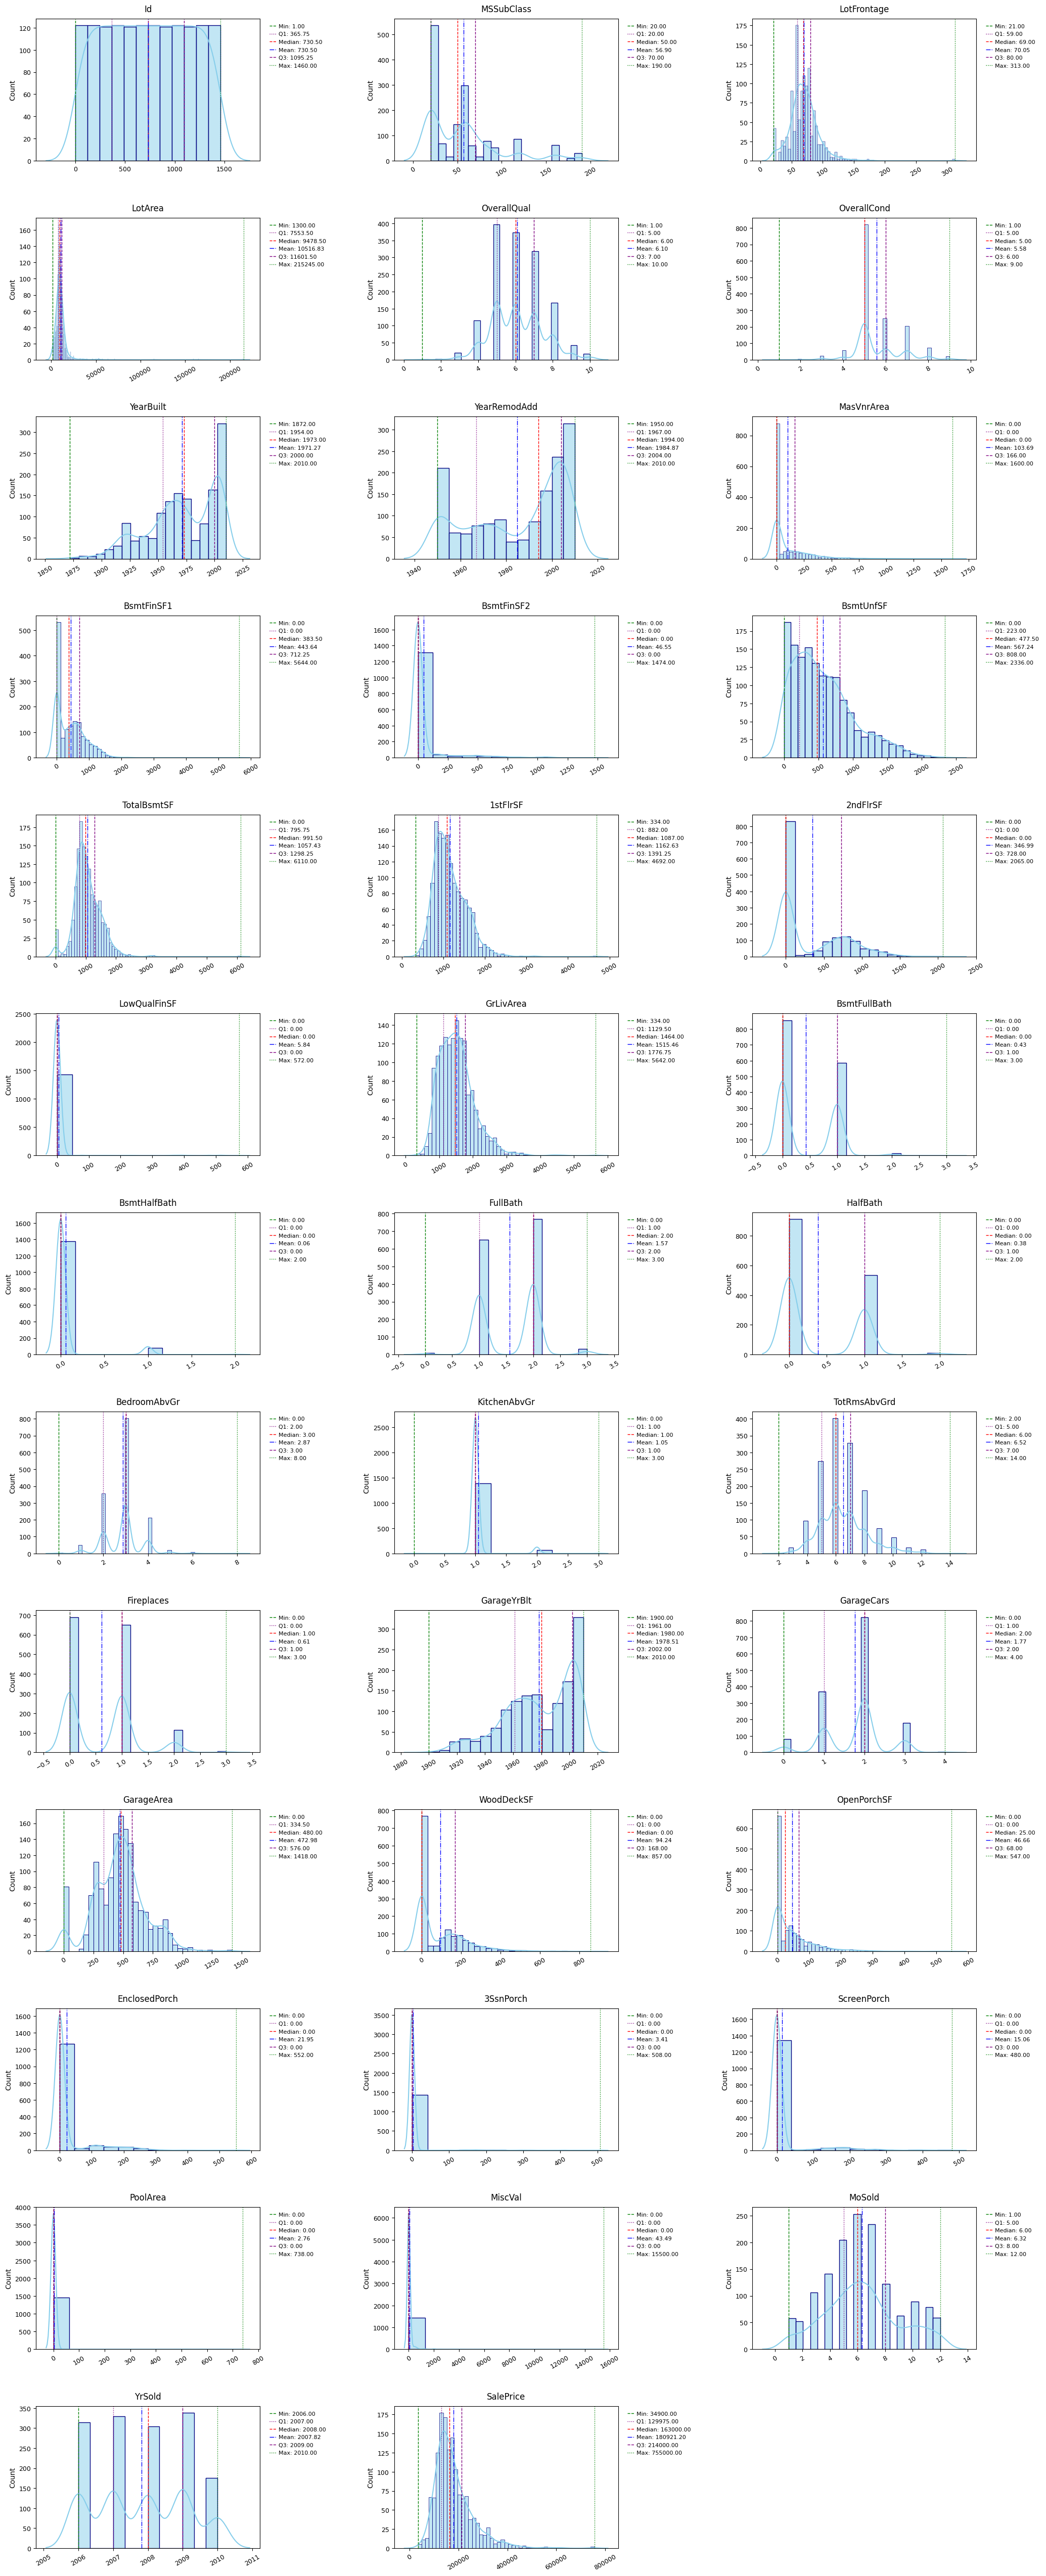

In [2]:
def explore_numeric_variables(df, name="DataFrame"):
    df_copy = df.copy()
    df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) == 0:
        print(f"\nNo numeric columns found in {name}.\n")
        return pd.DataFrame()

    dtypes = df_copy.dtypes
    missing_count = df_copy.isna().sum()
    missing_percent = (missing_count / len(df_copy)) * 100
    base_info_df = pd.DataFrame({
        "Data Type": dtypes,
        "Missing Count": missing_count,
        "Missing %": missing_percent
    })
    numeric_info = base_info_df.loc[numeric_cols].copy()
    numeric_info.reset_index(inplace=True)
    numeric_info.rename(columns={"index": "Column"}, inplace=True)
    numeric_info.sort_values(by=["Data Type", "Column"], inplace=True)
    numeric_info.set_index("Column", inplace=True)

    sorted_numeric_cols = sorted(numeric_cols)
    desc_df = df_copy[sorted_numeric_cols].describe()
    desc_t = desc_df.T
    desc_t["Skewness"] = df_copy[sorted_numeric_cols].skew()
    desc_t["Kurtosis"] = df_copy[sorted_numeric_cols].kurt()

    numeric_merged = numeric_info.merge(
        desc_t, 
        left_index=True, 
        right_index=True, 
        how="left"
    )

    print(f"\n=== {name.upper()} - Numeric Columns Analysis ===\n")
    # Round to 3 decimals just for display
    display(numeric_merged.round(3))

    # Create subplot grid
    ncols = 3
    nrows = math.ceil(len(numeric_cols) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(8*ncols, 5*nrows), squeeze=False)
    plt.subplots_adjust(wspace=0.6, hspace=0.4)
    axes_flat = axes.flatten()

    with warnings.catch_warnings():
        # Only ignore the specific FutureWarning from seaborn
        warnings.filterwarnings(
            "ignore",
            message="use_inf_as_na option is deprecated and will be removed in a future version",
            category=FutureWarning
        )

        for idx, col in enumerate(numeric_cols):
            ax = axes_flat[idx]
            data = df_copy[col].dropna()
            if data.empty:
                ax.set_visible(False)
                continue

            stats_map = {
                'Min': data.min(),
                'Q1': data.quantile(0.25),
                'Median': data.median(),
                'Mean': data.mean(),
                'Q3': data.quantile(0.75),
                'Max': data.max()
            }

            sns.histplot( data, bins='auto', kde=True, ax=ax, color='skyblue', edgecolor='navy', kde_kws={'cut': 3}, line_kws={'color': 'darkred', 'linewidth': 1.5} )

            line_specs = [
                ('Min', 'green', '--'),
                ('Q1', 'purple', ':'),
                ('Median', 'red', '--'),
                ('Mean', 'blue', '-.'),
                ('Q3', 'purple', '--'),
                ('Max', 'green', ':')
            ]
            for stat_label, stat_color, stat_linestyle in line_specs:
                ax.axvline(
                    stats_map[stat_label], 
                    color=stat_color, 
                    ls=stat_linestyle, 
                    lw=1,
                    label=f"{stat_label}: {stats_map[stat_label]:.2f}"
                )

            ax.set_title(f"{col}", fontsize=12, pad=10)
            ax.tick_params(axis='both', labelsize=9)
            ax.set_xlabel('')
            if len(ax.get_xticks()) > 6:
                ax.tick_params(axis='x', rotation=30)

            ax.legend(
                loc='upper left',
                bbox_to_anchor=(1.02, 1),
                fontsize=8,
                frameon=False,
                handlelength=1.2,
                handletextpad=0.4
            )
            
    for ax in axes_flat[len(numeric_cols):]:
        ax.set_visible(False)

    plt.show()

    return numeric_merged

numeric_table = explore_numeric_variables(df_train, name="Train Data") 


=== TRAIN DATA - CATEGORICAL VARIABLES ===

--- Categorical Column Info ---


Data Type  Missing Count  Missing %  Number of Categories  \
Column                                                                    
Alley            object           1369    93.7700                     2   
BldgType         object              0     0.0000                     5   
BsmtCond         object             37     2.5300                     4   
BsmtExposure     object             38     2.6000                     4   
BsmtFinType1     object             37     2.5300                     6   
BsmtFinType2     object             38     2.6000                     6   
BsmtQual         object             37     2.5300                     4   
CentralAir       object              0     0.0000                     2   
Condition1       object              0     0.0000                     9   
Condition2       object              0     0.0000                     8   
Electrical       object              1     0.0700                     5   
ExterCond        object              0     0.0000                     5   
ExterQual        object              0     0.0000                     4   
Exterior1st      object              0     0.0000                    15   
Exterior2nd      object              0     0.0000                    16   
Fence            object           1179    80.7500                     4   
FireplaceQu      object            690    47.2600                     5   
Foundation       object              0     0.0000                     6   
Functional       object              0     0.0000                     7   
GarageCond       object             81     5.5500                     5   
GarageFinish     object             81     5.5500                     3   
GarageQual       object             81     5.5500                     5   
GarageType       object             81     5.5500                     6   
Heating          object              0     0.0000                     6   
HeatingQC        object              0     0.0000                     5   
HouseStyle       object              0     0.0000                     8   
KitchenQual      object              0     0.0000                     4   
LandContour      object              0     0.0000                     4   
LandSlope        object              0     0.0000                     3   
LotConfig        object              0     0.0000                     5   
LotShape         object              0     0.0000                     4   
MSZoning         object              0     0.0000                     5   
MasVnrType       object            872    59.7300                     3   
MiscFeature      object           1406    96.3000                     4   
Neighborhood     object              0     0.0000                    25   
PavedDrive       object              0     0.0000                     3   
PoolQC           object           1453    99.5200                     3   
RoofMatl         object              0     0.0000                     8   
RoofStyle        object              0     0.0000                     6   
SaleCondition    object              0     0.0000                     6   
SaleType         object              0     0.0000                     9   
Street           object              0     0.0000                     2   
Utilities        object              0     0.0000                     2   

                                               Sample Categories  
Column                                                            
Alley                                                 Grvl, Pave  
BldgType                     1Fam, 2fmCon, Duplex, TwnhsE, Twnhs  
BsmtCond                                          TA, Gd, Fa, Po  
BsmtExposure                                      No, Gd, Mn, Av  
BsmtFinType1                        GLQ, ALQ, Unf, Rec, BLQ, LwQ  
BsmtFinType2                        Unf, BLQ, ALQ, Rec, LwQ, GLQ  
BsmtQual                                          Gd, TA, Ex, Fa  
CentralAir                         



--- Categorical Distributions (Bar Charts) ---


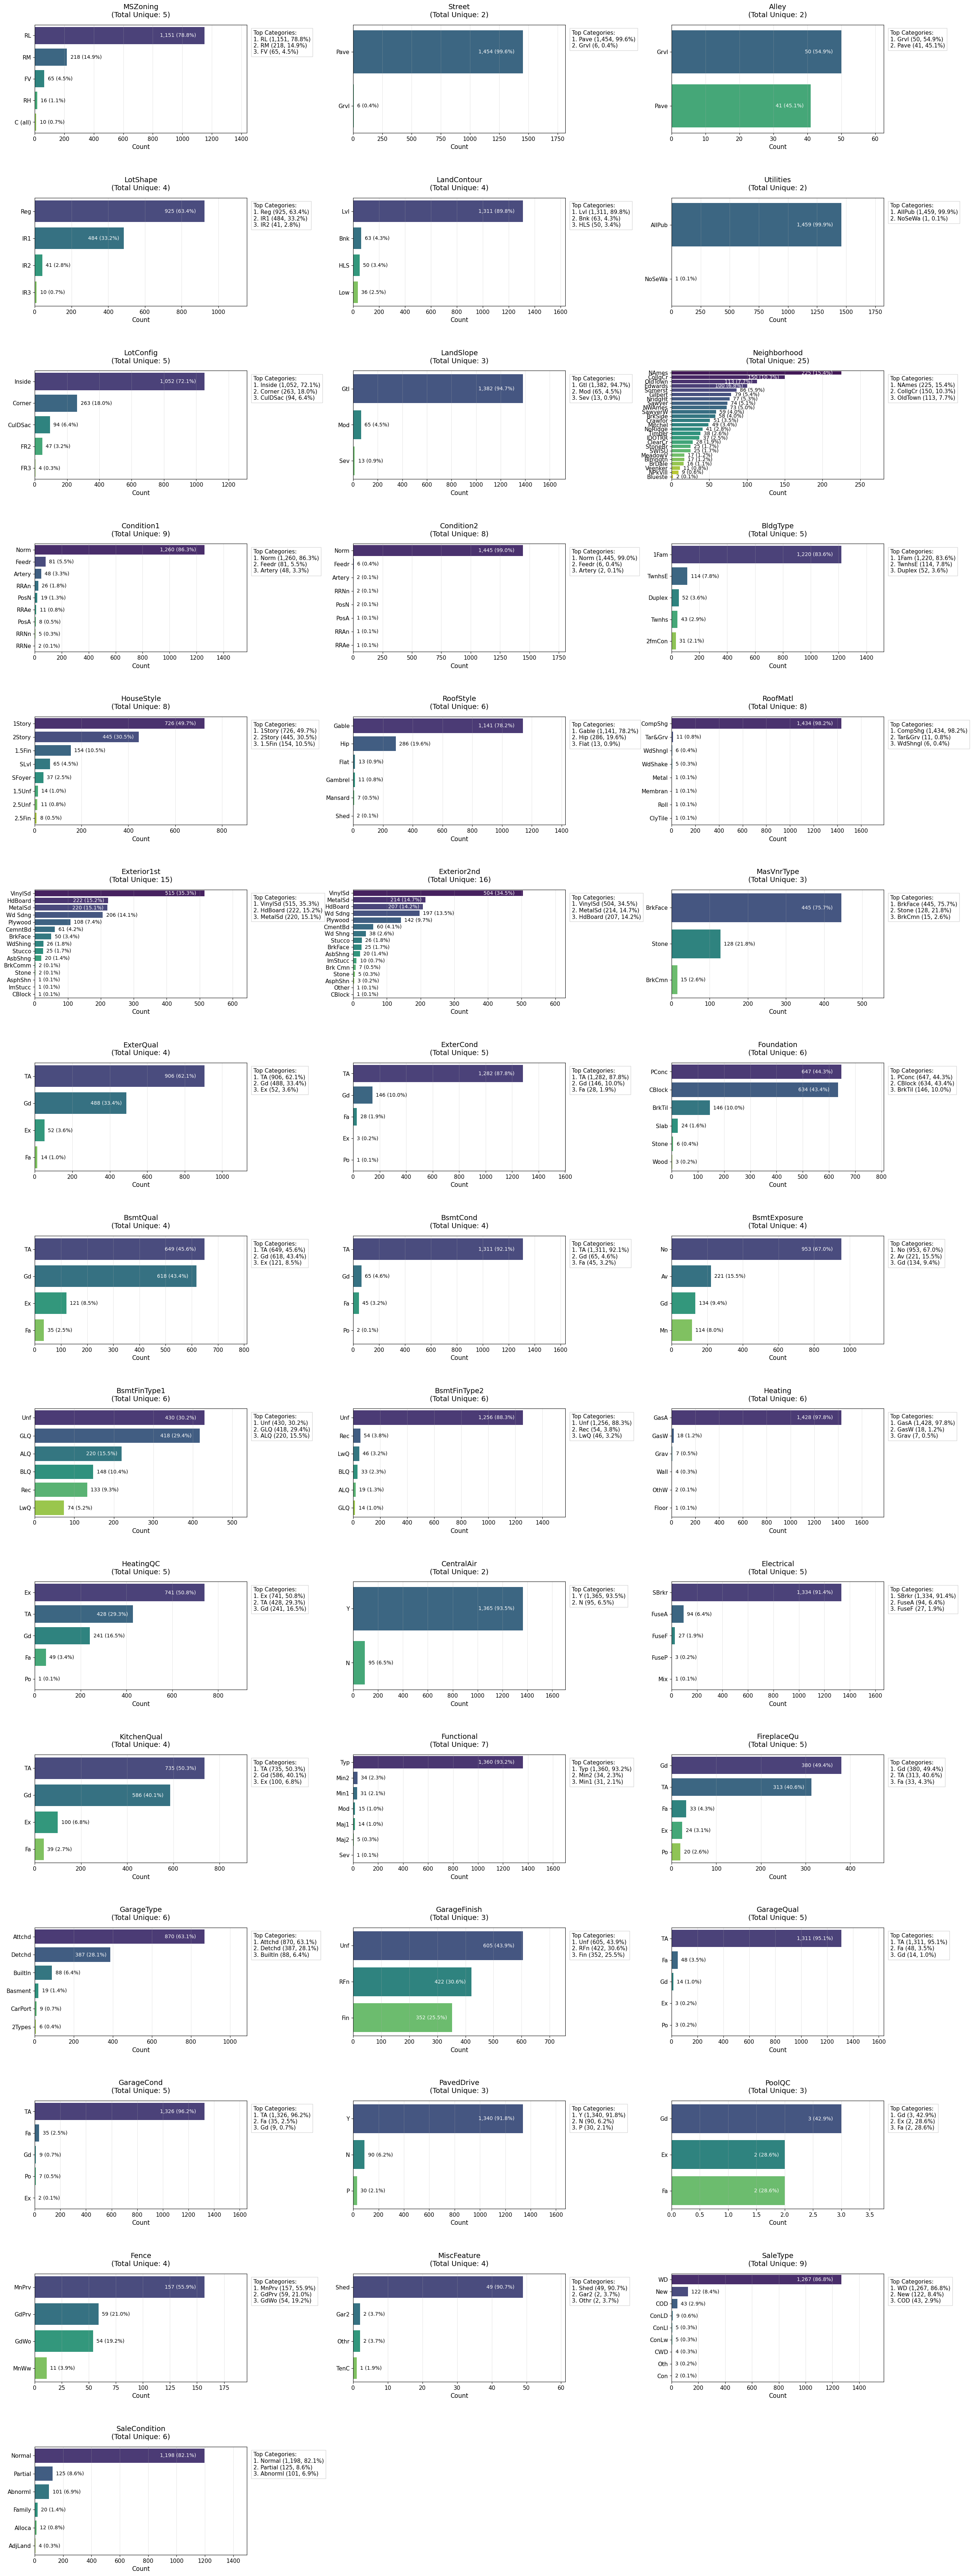

In [3]:
def explore_categorical_variables(df, name="DataFrame", max_cat_values=10, max_unique=20):

    df_copy = df_train.copy()
    df_copy.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    cat_cols = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()

    if not cat_cols:
        print(f"No categorical columns found in {name}.")
        return pd.DataFrame()

    print(f"=== {name.upper()} - CATEGORICAL VARIABLES ===\n")

    dtypes = df_copy.dtypes
    missing_count = df_copy.isna().sum()
    missing_percent = (missing_count / len(df_copy)) * 100

    base_info_df = pd.DataFrame({
        "Data Type": dtypes,
        "Missing Count": missing_count,
        "Missing %": missing_percent
    })

    cat_info = base_info_df.loc[cat_cols].copy()

    cat_info["Number of Categories"] = 0
    cat_info["Sample Categories"] = ""

    for col in cat_cols:
        unique_vals = df_copy[col].dropna().unique()
        n_unique = len(unique_vals)
        cat_info.at[col, "Number of Categories"] = n_unique

        # Show up to 'max_cat_values' unique category values
        sample_vals = unique_vals[:max_cat_values]
        sample_str = ", ".join(str(val) for val in sample_vals)
        if n_unique > max_cat_values:
            sample_str += ", ..."

        cat_info.at[col, "Sample Categories"] = sample_str

    
    cat_info.reset_index(inplace=True)
    cat_info.rename(columns={"index": "Column"}, inplace=True)
    cat_info.sort_values(by=["Data Type", "Column"], inplace=True)
    cat_info.set_index("Column", inplace=True)

    print("--- Categorical Column Info ---")
    display(cat_info.round(2))

    print("\n\n--- Categorical Distributions (Bar Charts) ---")

    ncols = 3
    nrows = math.ceil(len(cat_cols) / ncols)
    fig, axes = plt.subplots(nrows, ncols,
                             figsize=(10*ncols, 6*nrows),
                             squeeze=False)
    plt.subplots_adjust(wspace=0.5, hspace=0.6)
    axes_flat = axes.flatten()

    for idx, col in enumerate(cat_cols):
        ax = axes_flat[idx]
        data = df_copy[col].dropna()
        if data.empty:
            ax.set_visible(False)
            continue

        # Get value counts and percentages (top max_unique only)
        value_counts = data.value_counts().head(max_unique)
        percentages = (value_counts / len(data)) * 100

        max_count = value_counts.max()

        sns.barplot(x=value_counts.values, y=value_counts.index,
                    ax=ax, order=value_counts.index, palette='viridis')

        ax.set_xlim(right=max_count * 1.25)

        for i, (count, pct) in enumerate(zip(value_counts, percentages)):
            if count > max_count * 0.4:
                color = 'white'
                x_pos = count * 0.95
                ha = 'right'
            else:
                color = 'black'
                x_pos = count + (max_count * 0.02)
                ha = 'left'

            ax.text(x_pos, i,
                    f'{count:,} ({pct:.1f}%)',
                    va='center', fontsize=10,
                    color=color, ha=ha)

        ax.set_title(f"{col}\n(Total Unique: {len(data.value_counts())})",
                     fontsize=14, pad=15)
        ax.set_xlabel('Count', fontsize=12)
        ax.set_ylabel('')
        ax.tick_params(axis='y', labelsize=11)
        ax.tick_params(axis='x', labelsize=11)
        ax.grid(axis='x', alpha=0.3)

        top_n = value_counts.head(3)
        summary_lines = ["Top Categories:"]
        for j in range(len(top_n)):
            summary_lines.append(f"{j+1}. {top_n.index[j]} ({top_n.iloc[j]:,}, {percentages.iloc[j]:.1f}%)")

        ax.text(1.03, 0.95, '\n'.join(summary_lines),
                transform=ax.transAxes, ha='left', va='top',
                fontsize=11,
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='lightgray'))

    for ax in axes_flat[len(cat_cols):]:
        ax.set_visible(False)

    plt.show()

    return cat_info

cat_table = explore_categorical_variables(df_train, name="Train Data", max_cat_values=50, max_unique=50)



=== SECTION A: Correlation vs. Target (limit 12) ===




=== SECTION B: Pairwise Correlations (top 8 by max abs correlation across 3 methods) ===




=== SECTION C: Pairplots for columns in top 8 pairs + 'SalePrice' ===

Pairplot columns: ['1stFlrSF', 'TotalBsmtSF', 'YearRemodAdd', 'OverallQual', 'GarageYrBlt', 'GrLivArea', 'SalePrice', 'YearBuilt', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


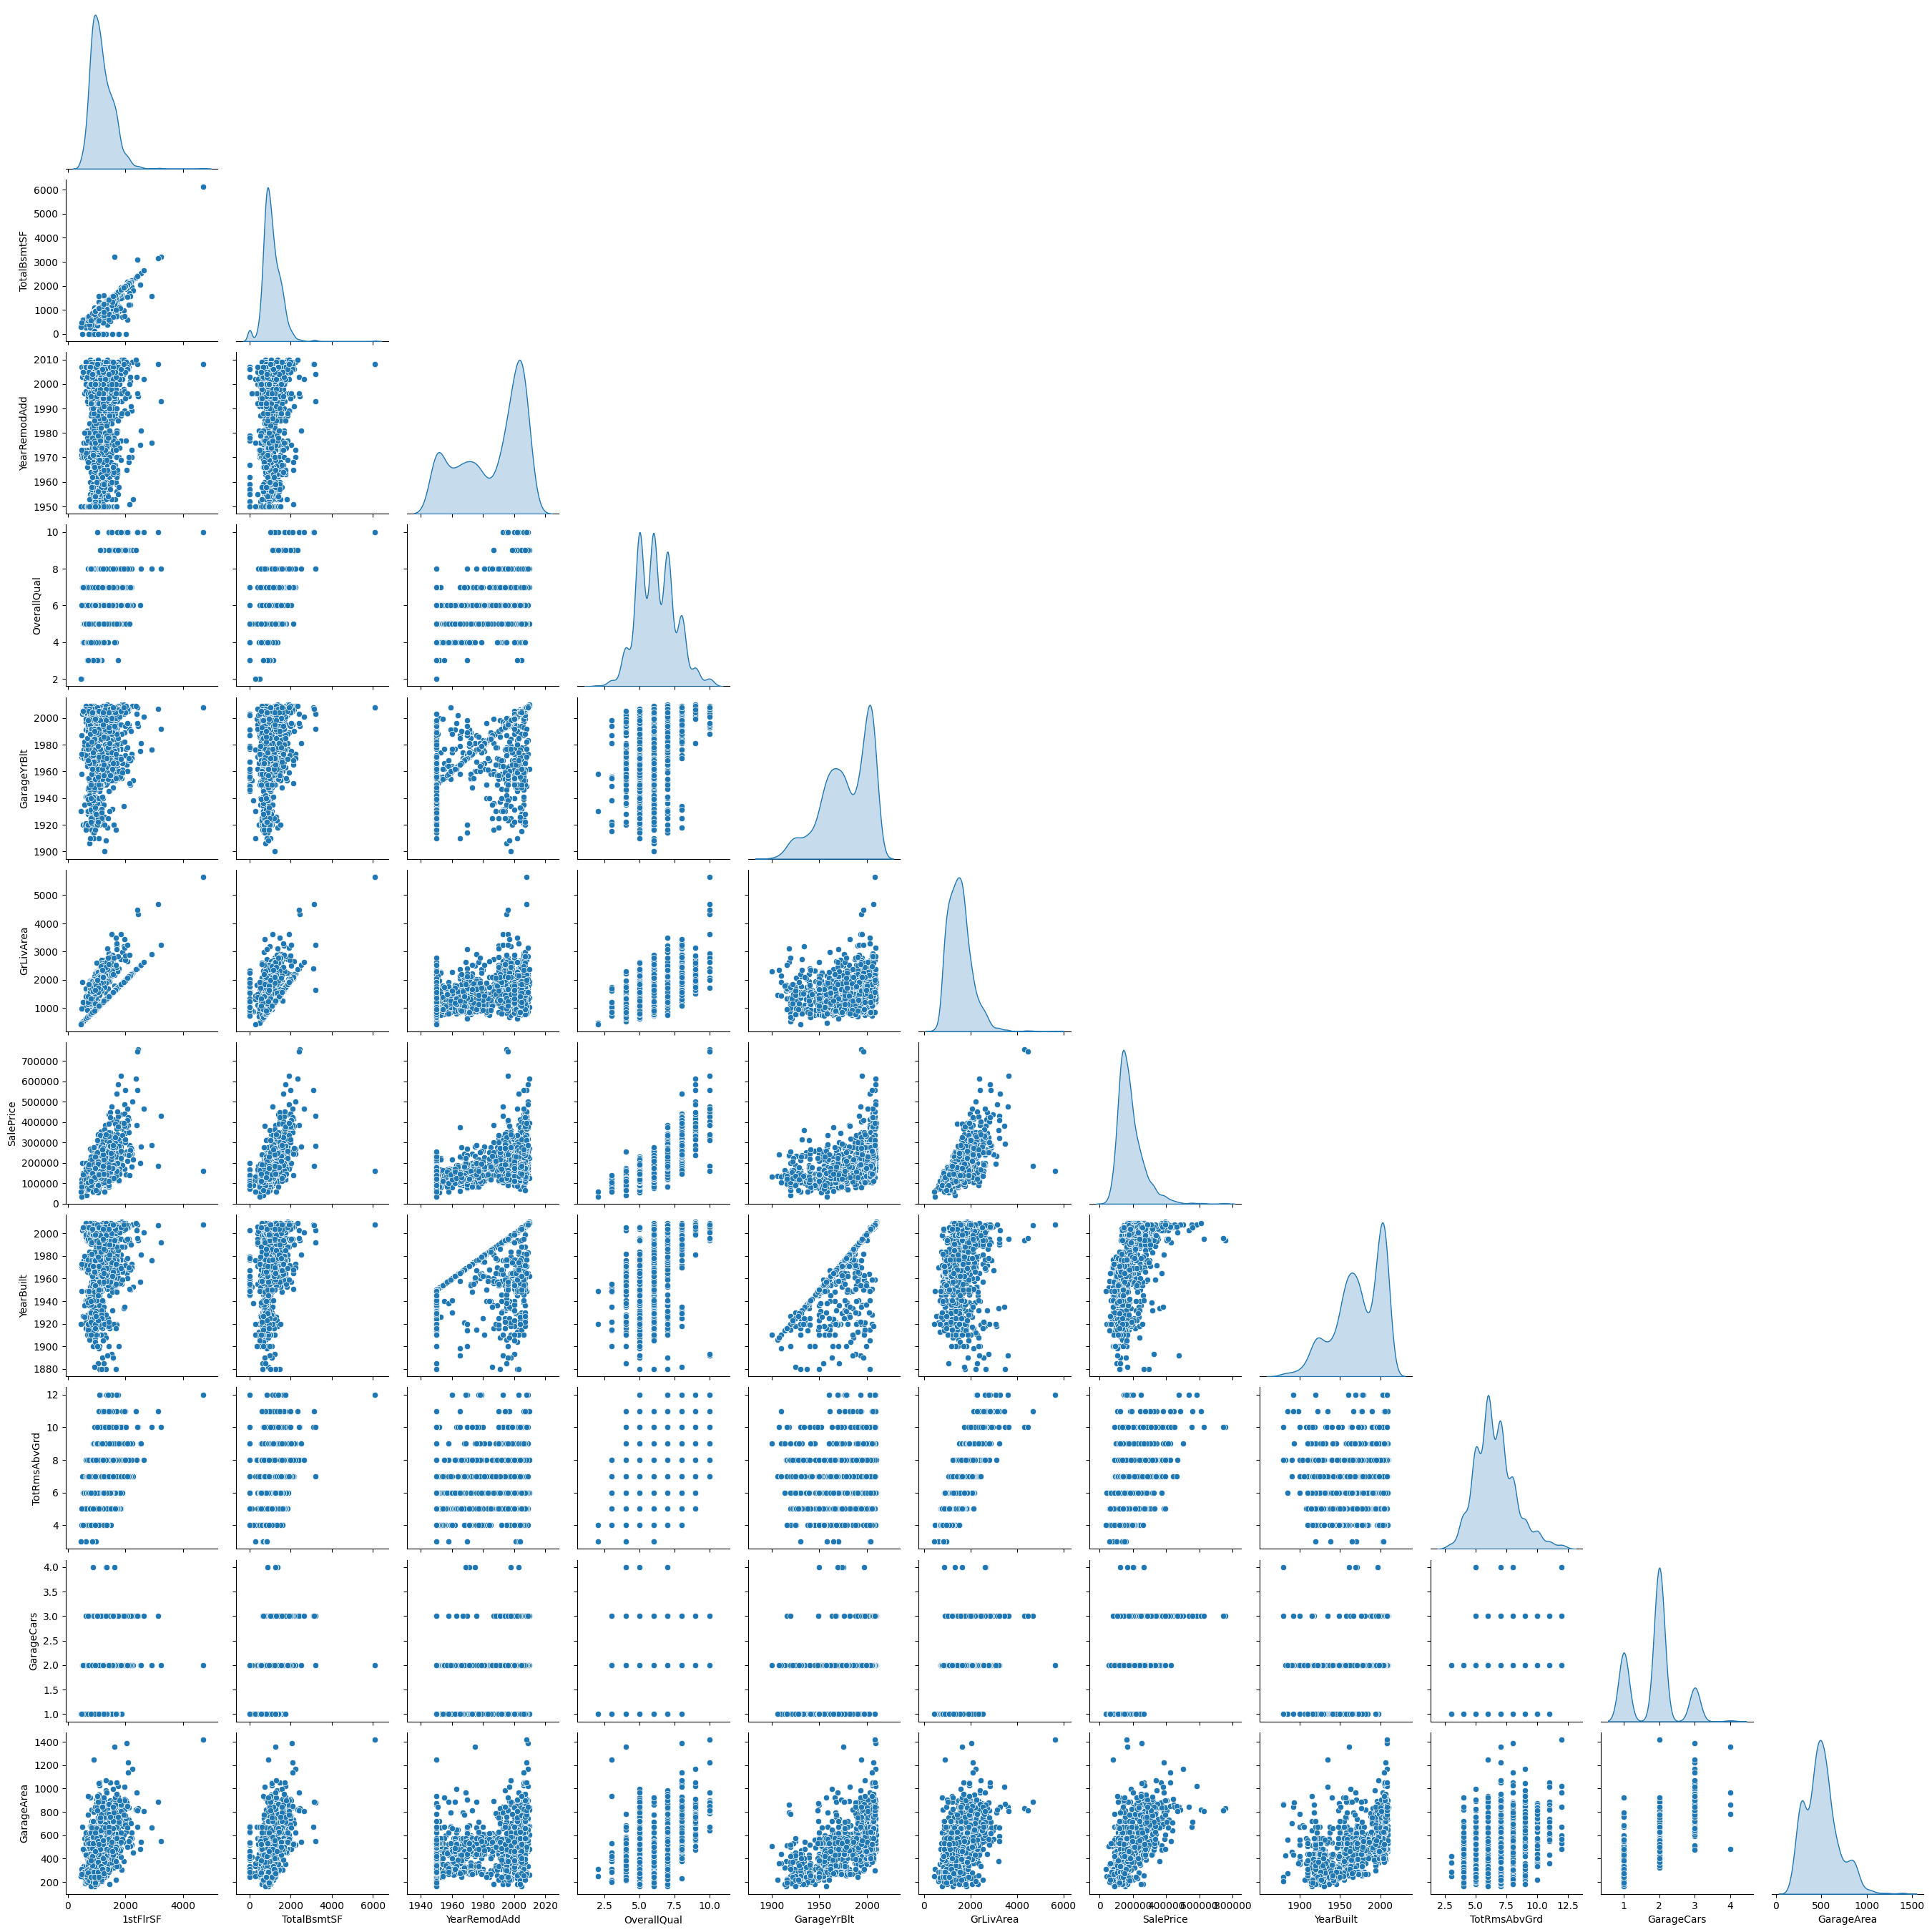

In [4]:

def multi_correlation_analysis(
    df,
    target_col,
    threshold=0.75,
    top_target=12,  
    top_pairs=15   
):
  
    df_num = df.select_dtypes(include=[np.number]).copy()
    if target_col not in df_num.columns:
        raise ValueError(f"Target column '{target_col}' not found among numeric columns.")

    df_num.replace([np.inf, -np.inf], np.nan, inplace=True)
    numeric_cols = df_num.columns.tolist()

    if len(numeric_cols) < 2:
        print("Not enough numeric columns for correlation analysis.")
        return pd.DataFrame(), pd.DataFrame()
 
    corr_pearson  = df_num.corr(method='pearson')
    corr_spearman = df_num.corr(method='spearman')
    corr_kendall  = df_num.corr(method='kendall')
 
    print(f"\n=== SECTION A: Correlation vs. Target (limit {top_target}) ===\n")
 
    pearson_t  = corr_pearson[target_col].drop(labels=target_col, errors='ignore')
    spearman_t = corr_spearman[target_col].drop(labels=target_col, errors='ignore')
    kendall_t  = corr_kendall[target_col].drop(labels=target_col, errors='ignore')
 
    corr_vs_target = pd.DataFrame({
        'Column': pearson_t.index,
        'Pearson': pearson_t.values,
        'Spearman': spearman_t.values,
        'Kendall': kendall_t.values
    }) 
    corr_vs_target['max_abs'] = corr_vs_target[['Pearson','Spearman','Kendall']].abs().max(axis=1) 
    corr_vs_target.sort_values('max_abs', ascending=False, inplace=True) 
    corr_vs_target = corr_vs_target.head(top_target).copy() 
    corr_vs_target.drop(columns='max_abs', inplace=True)
    corr_vs_target.reset_index(drop=True, inplace=True)
 
    def highlight_corr(val):
        return 'background-color: yellow;' if abs(val) > threshold else ''
 
    styled_target = (corr_vs_target.style
                     .map(highlight_corr, subset=['Pearson','Spearman','Kendall'])
                     .hide(axis="index"))
    display(styled_target)
 
    print(f"\n=== SECTION B: Pairwise Correlations (top {top_pairs} by max abs correlation across 3 methods) ===\n")
 
    pairs_data = []
    for i in range(len(numeric_cols)):
        for j in range(i+1, len(numeric_cols)):
            f1, f2 = numeric_cols[i], numeric_cols[j]
            p_val = corr_pearson.loc[f1, f2]
            s_val = corr_spearman.loc[f1, f2]
            k_val = corr_kendall.loc[f1, f2]
            pairs_data.append((f1, f2, p_val, s_val, k_val))

    corr_pairs_df = pd.DataFrame(
        pairs_data,
        columns=['Feature1','Feature2','Pearson','Spearman','Kendall']
    )
 
    corr_pairs_df['max_abs'] = corr_pairs_df[['Pearson','Spearman','Kendall']].abs().max(axis=1) 
    corr_pairs_df.sort_values('max_abs', ascending=False, inplace=True) 
    top_pairs_df = corr_pairs_df.head(top_pairs).copy() 
    top_pairs_df.drop(columns='max_abs', inplace=True)

    def highlight_pairs(val):
        return 'background-color: orange;' if abs(val) > threshold else ''

    styled_pairs = (top_pairs_df.style
                    .map(highlight_pairs, subset=['Pearson','Spearman','Kendall'])
                    .hide(axis="index"))
    display(styled_pairs)
 
    print(f"\n=== SECTION C: Pairplots for columns in top {top_pairs} pairs + '{target_col}' ===\n")
 
    top_cols_set = set()
    for _, row in top_pairs_df.iterrows():
        top_cols_set.add(row['Feature1'])
        top_cols_set.add(row['Feature2'])
 
    top_cols_set.add(target_col)
    top_cols = list(top_cols_set)
 
    pairplot_df = df_num[top_cols].dropna()
    print(f"Pairplot columns: {top_cols}")
    sns.pairplot(pairplot_df, corner=True, diag_kind='kde')
    plt.show()

    return corr_vs_target, top_pairs_df


corr_target_table, top_pairs_table = multi_correlation_analysis(
    df=df_train,
    target_col="SalePrice",
    threshold=0.80,
    top_target=12,
    top_pairs=8
)
 

=== STEP 1: Loading Data ===
DataFrame shape: (1460, 81)

=== STEP 2: Splitting off the target and dropping ID ===

[DATA] X shape: (1460, 79), y shape: (1460,)

-> Numeric columns (36): ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

-> Categorical columns (43): ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Bsmt


=== FEATURES DROPPED DUE TO HIGH VIF ===



Final numeric feature set after VIF-based removal (for Plain OLS): 32 features.
X shape for Plain OLS (post-VIF): (1460, 75)

=== STEP 3: Building Preprocessor Pipeline for Plain OLS ===

-> After VIF-based preprocessing (one-hot): 240 columns from original 79.

=== STEP 4: Defining the Linear Model Pipelines and Hyperparameter Tuning ===

This section defines and tunes the following linear models:

1. Plain OLS: Uses the VIF-filtered dataset (preprocessor_vif); no hyperparameter tuning is required.

2. Linear Regression (w Lasso Subset Selection): Uses the full dataset (one-hot encoded) with feature selection
   via LassoCV wrapped in SelectFromModel. We perform hyperparameter tuning over the 'alphas' parameter.

3. Pure Lasso Regression: Uses the full dataset (one-hot encoded) with LassoCV as the final estimator.
   Hyperparameter tuning is performed over the 'alphas' parameter.

4. Ridge Regression: Uses the full dataset (one-hot encoded) with hyperparameter tuning over 'alpha'.

5

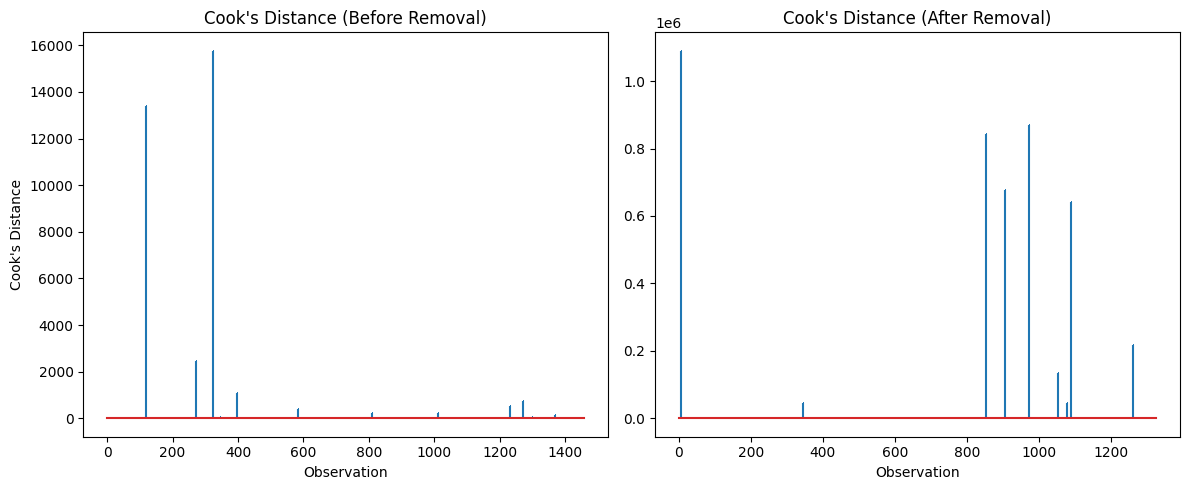

After removal, training data has 1327 observations.

=== STEP 6: 5-Fold Cross-Validation Summary ===

Fold 1 complete.
Fold 2 complete.
Fold 3 complete.
Fold 4 complete.
Fold 5 complete.

Detailed fold-by-fold results:


Fold  Plain OLS R²  Plain OLS RMSE  \
0     1        0.7949          0.1956   
1     2        0.8984          0.1257   
2     3        0.6106          0.2342   
3     4        0.8633          0.1555   
4     5        0.7399          0.1878   

   Linear Regression (w Lasso Subset Selection) R²  \
0                                           0.8909   
1                                           0.8895   
2                                           0.6495   
3                                           0.9077   
4                                           0.8866   

   Linear Regression (w Lasso Subset Selection) RMSE  \
0                                             0.1427   
1                                             0.1310   
2                                             0.2222   
3                                             0.1278   
4                                             0.1240   

   Pure Lasso Regression R²  Pure Lasso Regression RMSE  Ridge Regression R²  \
0                    0.8920                      0.1420               0.8970   
1                    0.8984                      0.1257               0.8964   
2                    0.6302                      0.2282               0.6413   
3                    0.9111                      0.1254               0.9045   
4                    0.8955                      0.1190               0.8963   

   Ridge Regression RMSE  kNN R²  kNN RMSE  GLM (Tweedie) R²  \
0                 0.1386  0.7806    0.2023            0.8971   
1                 0.1269  0.7620    0.1923            0.8960   
2                 0.2248  0.7332    0.1939            0.6416   
3                 0.1299  0.7447    0.2125            0.9044   
4                 0.1186  0.7603    0.1803            0.8960   

   GLM (Tweedie) RMSE  XGBoost R²  XGBoost RMSE  
0              0.1386      0.8998        0.1367  
1              0.1271      0.9147        0.1152  
2              0.2247      0.8038        0.1662  
3              0.1301      0.9015        0.1320  
4              0.1188      0.9084        0.1115


=== 5-Fold CV Summary ===


Model  Mean R²  Std R²  Mean RMSE
0                                     Plain OLS   0.7814  0.1015     0.1798
1  Linear Regression (w Lasso Subset Selection)   0.8448  0.0980     0.1496
2                         Pure Lasso Regression   0.8454  0.1078     0.1481
3                              Ridge Regression   0.8471  0.1029     0.1478
4                                           kNN   0.7562  0.0162     0.1963
5                                 GLM (Tweedie)   0.8470  0.1028     0.1478
6                                       XGBoost   0.8856  0.0413     0.1323


=== STEP 7: Holdout Test Evaluation Summary ===


=== Holdout Test Performance Summary ===


Model  Holdout R²  Holdout RMSE
6                                       XGBoost      0.8998        0.1367
3                              Ridge Regression      0.8970        0.1386
5                                 GLM (Tweedie)      0.8969        0.1387
2                         Pure Lasso Regression      0.8920        0.1420
1  Linear Regression (w Lasso Subset Selection)      0.8909        0.1427
0                                     Plain OLS      0.7989        0.1937
4                                           kNN      0.7806        0.2023


=== STEP 8: Checking Linear Model Assumptions for Plain OLS ===
Using the cleaned training data (after removal of influential observations) for diagnostic plotting.



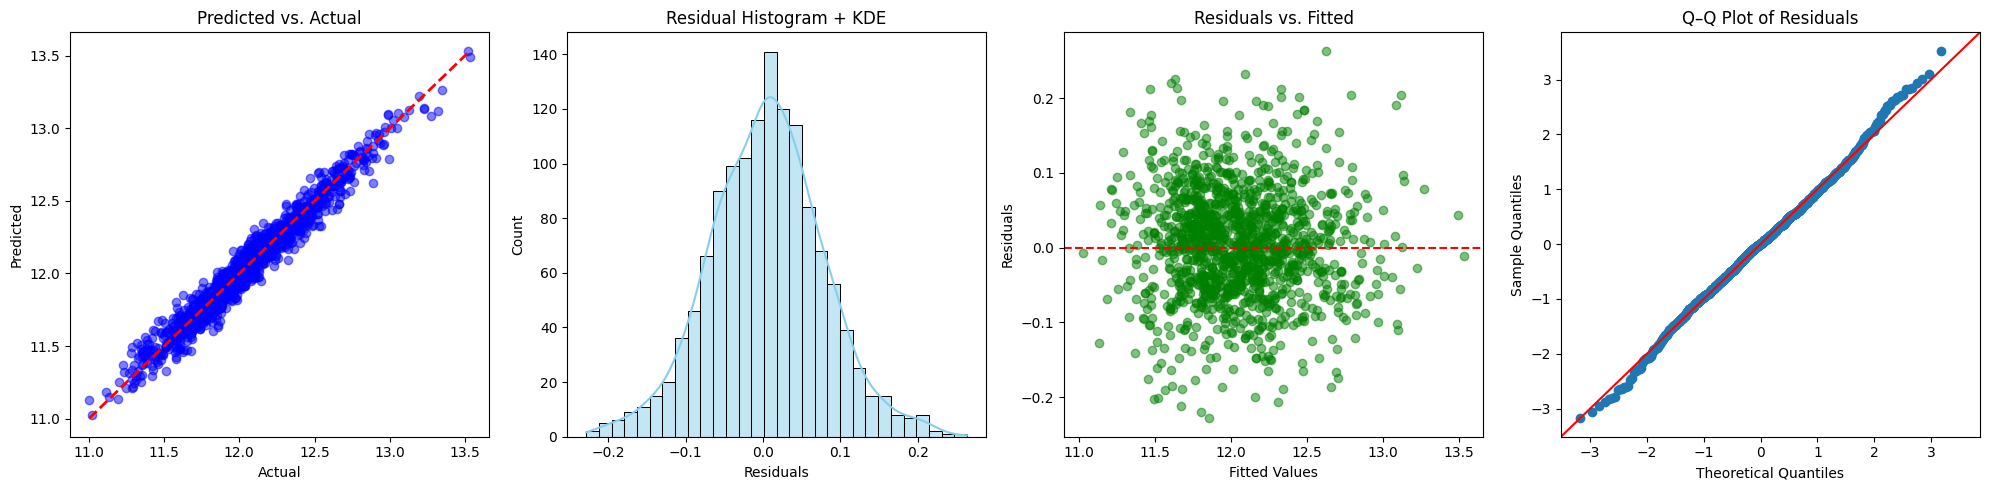

In [5]:
import os
import math
import warnings

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.4f}'.format)

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, TweedieRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

from IPython.display import display

warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")


###############################################
# STEP 2B: Helper Functions for VIF Computation
###############################################
def compute_vif_iteratively(df: pd.DataFrame, threshold: float = 10.0, max_iter: int = 5, topk: int = 10):
    temp_df = df.copy()
    dropped_cols = []
    iteration_records = []
    print("\n[INFO] Beginning iterative VIF analysis:")
    print(f"  - VIF threshold: {threshold}")
    print(f"  - Max iterations: {max_iter}")
    print(f"  - Recording top {topk} VIF features per iteration.\n")
    for iteration_idx in range(1, max_iter + 1):
        print(f"--- VIF CHECK Iteration {iteration_idx} ---")
        X_const = sm.add_constant(temp_df, has_constant='add')
        features = temp_df.columns
        vif_list = []
        for i, col in enumerate(features, start=1):
            vif_val = variance_inflation_factor(X_const.values, i)
            vif_list.append((col, vif_val))
        vif_df = pd.DataFrame(vif_list, columns=["feature", "VIF"])
        vif_df.sort_values(by="VIF", ascending=False, inplace=True)
        top_k_vif = vif_df.head(topk).reset_index(drop=True)
        worst_feat = vif_df.iloc[0]['feature']
        worst_vif_val = vif_df.iloc[0]['VIF']
        iteration_info = {
            'iteration': iteration_idx,
            'dropped_feature': None,
            'dropped_vif_value': None,
            'top_k_vif_df': top_k_vif
        }
        if worst_vif_val > threshold:
            print(f"  => Dropping '{worst_feat}' (VIF = {worst_vif_val:.2f}) as it exceeds {threshold}.\n")
            temp_df.drop(columns=[worst_feat], inplace=True)
            dropped_cols.append(worst_feat)
            iteration_info['dropped_feature'] = worst_feat
            iteration_info['dropped_vif_value'] = worst_vif_val
        else:
            print(f"Maximum VIF = {worst_vif_val:.2f} (<= {threshold}); stopping iterations.\n")
            iteration_records.append(iteration_info)
            break
        iteration_records.append(iteration_info)
    print(f"[INFO] Finished VIF checks. Used {len(iteration_records)} iterations out of {max_iter}.\n")
    return temp_df, dropped_cols, iteration_records

def build_iteration_summary_table(iteration_records, topk=10):
    wide_cols = []
    wide_data = [[] for _ in range(topk)]
    for record in iteration_records:
        iter_num = record['iteration']
        top_df = record['top_k_vif_df']
        col_feat = f"Feature_Iter{iter_num}"
        col_vif = f"VIF_Iter{iter_num}"
        wide_cols.extend([col_feat, col_vif])
        for i in range(topk):
            if i < len(top_df):
                wide_data[i].extend([top_df.loc[i, 'feature'], top_df.loc[i, 'VIF']])
            else:
                wide_data[i].extend(["---", np.nan])
    summary_wide_df = pd.DataFrame(wide_data, columns=wide_cols)
    dropped_records = []
    for record in iteration_records:
        if record['dropped_feature'] is not None:
            dropped_records.append({
                "Iteration": record['iteration'],
                "Dropped Feature": record['dropped_feature'],
                "Dropped VIF": record['dropped_vif_value']
            })
    dropped_table = pd.DataFrame(dropped_records)
    return summary_wide_df, dropped_table

def _shade_columns(val, col_index):
    base_color = "#edf8fc" if (col_index // 2) % 2 == 0 else "#ffffff"
    return f"background-color: {base_color};"

###############################################
# Helper Function: Check Linear Model Assumptions
###############################################
def check_linear_model_assumptions(pipeline, X_train_subset, y_train_subset):
    """
    Generates a 1×4 grid of diagnostic plots for the fitted linear model:
      1. Predicted vs. Actual
      2. Residual Histogram + KDE
      3. Residuals vs. Fitted Values
      4. Q–Q Plot of Residuals
    """
    y_pred = pipeline.predict(X_train_subset)
    residuals = y_train_subset - y_pred

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # 1. Predicted vs. Actual
    axes[0].scatter(y_train_subset, y_pred, alpha=0.5, color='blue')
    axes[0].plot([y_train_subset.min(), y_train_subset.max()],
                 [y_train_subset.min(), y_train_subset.max()], 'r--', lw=2)
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")
    axes[0].set_title("Predicted vs. Actual")
    
    # 2. Residual Histogram + KDE
    sns.histplot(residuals, kde=True, ax=axes[1], color='skyblue')
    axes[1].set_title("Residual Histogram + KDE")
    axes[1].set_xlabel("Residuals")
    
    # 3. Residuals vs. Fitted Values
    axes[2].scatter(y_pred, residuals, alpha=0.5, color='green')
    axes[2].axhline(0, color='red', linestyle='--')
    axes[2].set_xlabel("Fitted Values")
    axes[2].set_ylabel("Residuals")
    axes[2].set_title("Residuals vs. Fitted")
    
    # 4. Q–Q Plot of Residuals
    qqplot(residuals, line='45', ax=axes[3], fit=True)
    axes[3].set_title("Q–Q Plot of Residuals")
    
    plt.tight_layout()
    plt.show()

###############################################
# MAIN PIPELINE: Linear Models Only
###############################################

# STEP 1: Loading Data
print("=== STEP 1: Loading Data ===")
train_path = "/kaggle/input/home-data-for-ml-course/train.csv"
df = pd.read_csv(train_path)
print(f"DataFrame shape: {df.shape}\n")

# STEP 2: Splitting off the target and dropping ID
print("=== STEP 2: Splitting off the target and dropping ID ===\n")
target_col = "SalePrice"
y = np.log1p(df[target_col])
X = df.drop(columns=[target_col, "Id"], errors='ignore')
print(f"[DATA] X shape: {X.shape}, y shape: {y.shape}\n")
print(f"-> Numeric columns ({len(X.select_dtypes(include=[np.number]).columns.tolist())}): {X.select_dtypes(include=[np.number]).columns.tolist()}\n")
print(f"-> Categorical columns ({len(X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist())}): {X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()}\n")
print(f"-> Total original features: {len(X.columns)}\n")

# STEP 2B: Checking & Mitigating Multicollinearity (for Plain OLS)
print("=== STEP 2B: Checking & Mitigating Multicollinearity (for Plain OLS) ===\n")
print("Plain OLS is highly sensitive to multicollinearity; we drop features with VIF > 10.")
print("Regularized models are robust to collinearity; hence, only Plain OLS uses the VIF-filtered set.\n")
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
num_df = X[numeric_cols].copy().fillna(X[numeric_cols].mean())
clean_num_df, dropped_feats, iteration_logs = compute_vif_iteratively(df=num_df, threshold=10.0, max_iter=5, topk=10)
summary_wide_df, dropped_feat_df = build_iteration_summary_table(iteration_logs, topk=10)
print("=== SUMMARY OF TOP-10 VIF VALUES PER ITERATION ===")
display(summary_wide_df.style.apply(lambda row: [_shade_columns(val, i) for i, val in enumerate(row)], axis=1))
print("\n=== FEATURES DROPPED DUE TO HIGH VIF ===")
if not dropped_feat_df.empty:
    display(dropped_feat_df.style.set_properties(**{'background-color': '#ffebe6'}))
else:
    print("No features were dropped (none exceeded the threshold).")
filtered_numeric_cols = list(clean_num_df.columns)
print(f"\nFinal numeric feature set after VIF-based removal (for Plain OLS): {len(filtered_numeric_cols)} features.")
X_ols = X[filtered_numeric_cols + X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()]
print(f"X shape for Plain OLS (post-VIF): {X_ols.shape}\n")

# STEP 3: Building Preprocessor Pipeline for Plain OLS
print("=== STEP 3: Building Preprocessor Pipeline for Plain OLS ===\n")
# For Plain OLS we use RobustScaler (to mitigate outliers) and one-hot encoding.
preprocessor_vif = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="mean")),
            ("scale", RobustScaler())
        ]), filtered_numeric_cols),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("encode", OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), X.select_dtypes(include=["object", "category", "bool"]).columns.tolist())
    ],
    remainder='drop'
)
preprocessor_vif.fit(X)
X_ols_preprocessed = preprocessor_vif.transform(X)
print(f"-> After VIF-based preprocessing (one-hot): {X_ols_preprocessed.shape[1]} columns from original {X.shape[1]}.\n")

# =============================================================================
# STEP 4: Defining the Linear Model Pipelines and Hyperparameter Tuning
# =============================================================================
print("=== STEP 4: Defining the Linear Model Pipelines and Hyperparameter Tuning ===\n")
print("This section defines and tunes the following linear models:\n")
print("1. Plain OLS: Uses the VIF-filtered dataset (preprocessor_vif); no hyperparameter tuning is required.\n")
print("2. Linear Regression (w Lasso Subset Selection): Uses the full dataset (one-hot encoded) with feature selection")
print("   via LassoCV wrapped in SelectFromModel. We perform hyperparameter tuning over the 'alphas' parameter.\n")
print("3. Pure Lasso Regression: Uses the full dataset (one-hot encoded) with LassoCV as the final estimator.")
print("   Hyperparameter tuning is performed over the 'alphas' parameter.\n")
print("4. Ridge Regression: Uses the full dataset (one-hot encoded) with hyperparameter tuning over 'alpha'.\n")
print("5. k-Nearest Neighbors (kNN): Uses the full dataset with ordinal encoding; tuned over 'n_neighbors'.\n")
print("6. GLM (TweedieRegressor): Uses the full dataset (one-hot encoded); since the target is approximately normal,")
print("   we set 'power'=0 and tune 'alpha'.\n")
print("7. XGBoost: Uses the full dataset with ordinal encoding; tuned over 'max_depth', 'learning_rate', and 'n_estimators'.\n")

# --- Model 1: Plain OLS ---
print("--- Model 1: Plain OLS ---")
pipe_ols = Pipeline([
    ("preprocessor", preprocessor_vif),
    ("regressor", LinearRegression())
])
print("Plain OLS pipeline created. (No hyperparameter tuning required.)\n")

# --- Define a full-dataset preprocessor for models that use the full feature set ---
preprocessor_full = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="mean")),
            ("scale", StandardScaler())
        ]), X.select_dtypes(include=[np.number]).columns.tolist()),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("encode", OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), X.select_dtypes(include=["object", "category", "bool"]).columns.tolist())
    ],
    remainder='drop'
)
preprocessor_full.fit(X)

# --- Model 2: Linear Regression (w Lasso Subset Selection) ---
print("--- Model 2: Linear Regression (w Lasso Subset Selection) ---")
pipe_lasso_subset = Pipeline([
    ("preprocessor", preprocessor_full),
    ("feature_selection", SelectFromModel(LassoCV(cv=5, random_state=42))),
    ("regressor", LinearRegression())
])
# Perform hyperparameter search over LassoCV's 'alphas'
lasso_subset_param_grid = {
    "feature_selection__estimator__alphas": [np.logspace(-3, 1, 10)]
}
print("Performing hyperparameter tuning for Lasso Subset Selection using GridSearchCV...")
gs_lasso_subset = GridSearchCV(pipe_lasso_subset, lasso_subset_param_grid, cv=5, scoring='r2', n_jobs=-1)
gs_lasso_subset.fit(X, y)
best_lasso_subset_alphas = gs_lasso_subset.best_params_["feature_selection__estimator__alphas"]
print(f"Best LassoCV alphas for subset selection found: {best_lasso_subset_alphas}\n")
pipe_lasso_subset.set_params(feature_selection__estimator__alphas=best_lasso_subset_alphas)
print("Linear Regression (w Lasso Subset Selection) pipeline created and tuned.\n")

# --- Model 3: Pure Lasso Regression ---
print("--- Model 3: Pure Lasso Regression ---")
pipe_lasso_pure = Pipeline([
    ("preprocessor", preprocessor_full),
    ("regressor", LassoCV(cv=5, random_state=42))
])
# Define grid search for LassoCV's 'alphas' parameter
lasso_pure_param_grid = {
    "regressor__alphas": [np.logspace(-3, 1, 10)]
}
print("Performing hyperparameter tuning for Pure Lasso Regression using GridSearchCV...")
gs_lasso_pure = GridSearchCV(pipe_lasso_pure, lasso_pure_param_grid, cv=5, scoring='r2', n_jobs=-1)
gs_lasso_pure.fit(X, y)
best_lasso_pure_alphas = gs_lasso_pure.best_params_["regressor__alphas"]
print(f"Best LassoCV alphas for pure Lasso regression found: {best_lasso_pure_alphas}\n")
pipe_lasso_pure.set_params(regressor__alphas=best_lasso_pure_alphas)
print("Pure Lasso Regression pipeline created and tuned.\n")

# --- Model 4: Ridge Regression ---
print("--- Model 4: Ridge Regression ---")
pipe_ridge = Pipeline([
    ("preprocessor", preprocessor_full),
    ("regressor", Ridge())
])
ridge_param_grid = {'regressor__alpha': np.logspace(-3, 3, 20)}
print("Performing hyperparameter tuning for Ridge Regression...")
gs_ridge = GridSearchCV(pipe_ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1)
gs_ridge.fit(X, y)
best_ridge_alpha = gs_ridge.best_params_['regressor__alpha']
print(f"Best Ridge alpha found: {best_ridge_alpha:.4f}\n")
pipe_ridge.set_params(regressor__alpha=best_ridge_alpha)
print("Ridge Regression pipeline created and tuned.\n")

# --- Model 5: k-Nearest Neighbors ---
print("--- Model 5: k-Nearest Neighbors (kNN) ---")
# For kNN, we use a preprocessor with ordinal encoding.
preprocessor_robust = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("impute", SimpleImputer(strategy="mean")),
            ("scale", StandardScaler())
        ]), X.select_dtypes(include=[np.number]).columns.tolist()),
        ("cat", Pipeline([
            ("impute", SimpleImputer(strategy="most_frequent")),
            ("encode", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]), X.select_dtypes(include=["object", "category", "bool"]).columns.tolist())
    ],
    remainder='drop'
)
preprocessor_robust.fit(X)
pipe_knn = Pipeline([
    ("preprocessor", preprocessor_robust),
    ("regressor", KNeighborsRegressor())
])
n_train_full = X.shape[0]
k_max = int(np.sqrt(n_train_full)) if int(np.sqrt(n_train_full)) > 1 else 10
knn_param_grid = {'regressor__n_neighbors': list(range(1, k_max+1))}
print("Performing hyperparameter tuning for kNN...")
gs_knn = GridSearchCV(pipe_knn, knn_param_grid, cv=5, scoring='r2', n_jobs=-1)
gs_knn.fit(X, y)
best_knn_k = gs_knn.best_params_['regressor__n_neighbors']
print(f"Best kNN n_neighbors found: {best_knn_k}\n")
pipe_knn.set_params(regressor__n_neighbors=best_knn_k)
print("kNN pipeline created and tuned.\n")

# --- Model 6: GLM (TweedieRegressor) ---
print("--- Model 6: GLM (TweedieRegressor) ---")
# Since the target is approximately normal, we set 'power'=0 for a Gaussian GLM.
pipe_glm = Pipeline([
    ("preprocessor", preprocessor_full),
    ("regressor", TweedieRegressor(max_iter=1000))
])
glm_param_grid = {
    'regressor__power': [0],
    'regressor__alpha': [0.001, 0.01, 0.1, 1.0]
}
print("Performing hyperparameter tuning for GLM (TweedieRegressor)...")
gs_glm = GridSearchCV(pipe_glm, glm_param_grid, cv=5, scoring='r2', n_jobs=-1)
gs_glm.fit(X, y)
best_glm_params = gs_glm.best_params_
print(f"Best GLM parameters found: {best_glm_params}\n")
pipe_glm.set_params(**best_glm_params)
print("GLM pipeline created and tuned.\n")

# --- Model 7: XGBoost ---
print("--- Model 7: XGBoost ---")
pipe_xgb = Pipeline([
    ("preprocessor", preprocessor_robust),
    ("regressor", XGBRegressor(objective='reg:squarederror', use_label_encoder=False, random_state=42))
])
xgb_param_grid = {
    'regressor__max_depth': [3, 5],
    'regressor__learning_rate': [0.1, 0.01],
    'regressor__n_estimators': [100, 200]
}
print("Performing hyperparameter tuning for XGBoost...")
gs_xgb = GridSearchCV(pipe_xgb, xgb_param_grid, cv=5, scoring='r2', n_jobs=-1)
gs_xgb.fit(X, y)
best_xgb_params = gs_xgb.best_params_
print(f"Best XGBoost parameters found: {best_xgb_params}\n")
pipe_xgb.set_params(**best_xgb_params)
print("XGBoost pipeline created and tuned.\n")

# -----------------------------------------------------------------------------
# Summary of All Defined Pipelines
# -----------------------------------------------------------------------------
print("=== Model Pipelines Summary ===")
print("Model 1: Plain OLS (uses VIF-filtered data; no hyperparameter tuning)")
print("Model 2: Linear Regression (w Lasso Subset Selection)")
print("   - Best LassoCV 'alphas' used:", best_lasso_subset_alphas)
print("Model 3: Pure Lasso Regression")
print("   - Best LassoCV 'alphas' used:", best_lasso_pure_alphas)
print("Model 4: Ridge Regression")
print("   - Best Ridge 'alpha':", best_ridge_alpha)
print("Model 5: k-Nearest Neighbors (kNN)")
print("   - Best kNN 'n_neighbors':", best_knn_k)
print("Model 6: GLM (TweedieRegressor)")
print("   - Best GLM parameters:", best_glm_params)
print("Model 7: XGBoost")
print("   - Best XGBoost parameters:", best_xgb_params)
print("\nAll linear model pipelines are now defined and tuned for subsequent evaluation.\n")

# =============================================================================
# STEP 5: Training Diagnostics & Cook's Distance Analysis (Plain OLS)
# =============================================================================
print("=== STEP 5: Training Diagnostics & Cook's Distance Analysis (Plain OLS) ===\n")
print("Fitting the Plain OLS model on the full (VIF-filtered) training set and computing training performance...\n")
X_train_full = X_ols
y_train_full = y
pipe_ols.fit(X_train_full, y_train_full)
y_train_pred = pipe_ols.predict(X_train_full)
train_r2 = r2_score(y_train_full, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train_full, y_train_pred))
print(f"Training Performance (Plain OLS): R² = {train_r2:.4f}, RMSE = {train_rmse:.4f}\n")

print("Performing Cook's Distance analysis on Plain OLS training data...")
X_preprocessed = pipe_ols.named_steps["preprocessor"].transform(X_train_full)
if hasattr(X_preprocessed, "toarray"):
    X_preprocessed = X_preprocessed.toarray()
X_sm = sm.add_constant(X_preprocessed, prepend=True)
ols_model = sm.OLS(y_train_full, X_sm, missing='drop').fit()
influence = ols_model.get_influence()
cooks_d, _ = influence.cooks_distance

threshold_cd = 4 / len(y_train_full)
suspect_idx = np.where(cooks_d > threshold_cd)[0]
print(f"Number of observations with Cook's Distance > {threshold_cd:.4f}: {len(suspect_idx)}\n")

# Remove influential observations and re-calculate Cook's Distance
X_train_clean = X_train_full.drop(index=X_train_full.index[suspect_idx])
y_train_clean = y_train_full.drop(index=y_train_full.index[suspect_idx])
X_preprocessed_clean = pipe_ols.named_steps["preprocessor"].transform(X_train_clean)
if hasattr(X_preprocessed_clean, "toarray"):
    X_preprocessed_clean = X_preprocessed_clean.toarray()
X_sm_clean = sm.add_constant(X_preprocessed_clean, prepend=True)
ols_model_clean = sm.OLS(y_train_clean, X_sm_clean, missing='drop').fit()
influence_clean = ols_model_clean.get_influence()
cooks_d_clean, _ = influence_clean.cooks_distance

# Plot Cook's Distance side by side: Before vs. After removal
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
axes[0].set_title("Cook's Distance (Before Removal)")
axes[0].set_xlabel("Observation")
axes[0].set_ylabel("Cook's Distance")
axes[1].stem(np.arange(len(cooks_d_clean)), cooks_d_clean, markerfmt=",", use_line_collection=True)
axes[1].set_title("Cook's Distance (After Removal)")
axes[1].set_xlabel("Observation")
plt.tight_layout()
plt.show()
print(f"After removal, training data has {X_train_clean.shape[0]} observations.\n")

# =============================================================================
# STEP 6: 5-Fold Cross-Validation Summary (All Models)
# =============================================================================
print("=== STEP 6: 5-Fold Cross-Validation Summary ===\n")
models = {
    "Plain OLS": pipe_ols,
    "Linear Regression (w Lasso Subset Selection)": pipe_lasso_subset,
    "Pure Lasso Regression": pipe_lasso_pure,
    "Ridge Regression": pipe_ridge,
    "kNN": pipe_knn,
    "GLM (Tweedie)": pipe_glm,
    "XGBoost": pipe_xgb
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []
fold = 1
for train_idx, val_idx in cv.split(X):
    fold_scores = {"Fold": fold}
    for model_name, model in models.items():
        # For Plain OLS, use VIF-filtered data; for others, use the full dataset.
        if model_name == "Plain OLS":
            X_train_cv = X_ols.iloc[train_idx]
            X_val_cv = X_ols.iloc[val_idx]
        else:
            X_train_cv = X.iloc[train_idx]
            X_val_cv = X.iloc[val_idx]
        model.fit(X_train_cv, y.iloc[train_idx])
        r2_cv = model.score(X_val_cv, y.iloc[val_idx])
        rmse_cv = np.sqrt(mean_squared_error(y.iloc[val_idx], model.predict(X_val_cv)))
        fold_scores[f"{model_name} R²"] = r2_cv
        fold_scores[f"{model_name} RMSE"] = rmse_cv
    cv_results.append(fold_scores)
    print(f"Fold {fold} complete.")
    fold += 1
cv_df = pd.DataFrame(cv_results)
print("\nDetailed fold-by-fold results:")
display(cv_df)
summary_list = []
for model_name in models:
    mean_r2 = np.mean(cv_df[f"{model_name} R²"])
    std_r2 = np.std(cv_df[f"{model_name} R²"])
    mean_rmse = np.mean(cv_df[f"{model_name} RMSE"])
    summary_list.append({"Model": model_name, "Mean R²": mean_r2, "Std R²": std_r2, "Mean RMSE": mean_rmse})
summary_df = pd.DataFrame(summary_list)
print("\n=== 5-Fold CV Summary ===")
display(summary_df)

# =============================================================================
# STEP 7: Holdout Test Evaluation Summary (All Models)
# =============================================================================
print("\n=== STEP 7: Holdout Test Evaluation Summary ===\n")
X_train_hold, X_test_hold, y_train_hold, y_test_hold = train_test_split(X, y, test_size=0.2, random_state=42)
holdout_results = []
for model_name, model in models.items():
    if model_name == "Plain OLS":
        X_train_used = X_ols.loc[X_train_hold.index]
        X_test_used = X_ols.loc[X_test_hold.index]
    else:
        X_train_used = X_train_hold
        X_test_used = X_test_hold
    model.fit(X_train_used, y_train_hold)
    r2_hold = model.score(X_test_used, y_test_hold)
    rmse_hold = np.sqrt(mean_squared_error(y_test_hold, model.predict(X_test_used)))
    holdout_results.append({
        "Model": model_name,
        "Holdout R²": r2_hold,
        "Holdout RMSE": rmse_hold
    })
holdout_df = pd.DataFrame(holdout_results).sort_values(by="Holdout R²", ascending=False)
print("\n=== Holdout Test Performance Summary ===")
display(holdout_df)

# =============================================================================
# STEP 8: Checking Linear Model Assumptions for Plain OLS
# =============================================================================
print("\n=== STEP 8: Checking Linear Model Assumptions for Plain OLS ===")
print("Using the cleaned training data (after removal of influential observations) for diagnostic plotting.\n")
# Display a 1×4 grid of diagnostic plots (Cook's Distance graphs are not repeated here).
check_linear_model_assumptions(pipe_ols, X_train_clean, y_train_clean)

# If you wish to view the detailed statsmodels OLS summary for the cleaned data, uncomment the following:
# X_transformed = pipe_ols.named_steps["preprocessor"].transform(X_train_clean)
# if hasattr(X_transformed, "toarray"):
#     X_transformed = X_transformed.toarray()
# X_sm_diag = sm.add_constant(X_transformed, prepend=True)
# ols_model_diag = sm.OLS(y_train_clean, X_sm_diag, missing='drop').fit()
# print("=== Detailed Statsmodels OLS Summary ===")
# print(ols_model_diag.summary())
